mali bransi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv("./sample_submission.csv")
print(df)
unique = df["MUSTERI_ID"].unique()
if (len(unique) == len(df["MUSTERI_ID"])):
    print("unique")

                                               MUSTERI_ID  LABEL
0       15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...    NaN
1       7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...    NaN
2       47498c1c6161aea484b0eed7997846919ca9287684aee4...    NaN
3       48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...    NaN
4       26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...    NaN
...                                                   ...    ...
195626  a81089c7050cfa5bdb47d519cfc616f66aa28bc5bda0b5...    NaN
195627  fd4362b714e47318627997b801111f34b25c243e6ae550...    NaN
195628  bf0aba86aa8ece82920ce0fea1d1a013d0f80f3761ad47...    NaN
195629  7cf9130d00d3393bb1a1f3b1815eb267c7546e90fc466a...    NaN
195630  08c299b06dbf1f9a5e3695f7234c752a53b87654bf336b...    NaN

[195631 rows x 2 columns]
unique


In [3]:
df_test = pd.read_csv("./test.csv", low_memory=False)
print(df_test.head())
df_test.columns

                                          MUSTERI_ID   FLAG  PP_CINSIYET  \
0  15b29e51dff893ac19bcbc96c96d1cda0307b4e0edafcd...  KASIM            2   
1  7532c2d4751858dd8e7eb3f26c61af568fd3b2a6aa2f32...  KASIM            1   
2  47498c1c6161aea484b0eed7997846919ca9287684aee4...  KASIM            1   
3  48fe7f96c7e04326f1669b4ae5bdc5ae030da6b8c26498...  KASIM            2   
4  26dbe514ebfdb7b664760c07f94d0bf0b297528cd5a358...  KASIM            1   

   PP_YAS       PP_MESLEK  PP_MUSTERI_SEGMENTI  PP_UYRUK    IL  \
0     467        Öğretmen                  103         1   1.0   
1     658        Öğretmen                  106         1  54.0   
2     634  Serbest Meslek                  106         1  48.0   
3     638             NaN                  106         1  67.0   
4      80         Öğrenci                  106         1  34.0   

  SORU_YATIRIM_KARAKTERI_CVP  SORU_YATIRIM_KARAKTERI_RG  ... HU11  HU12 HU13  \
0                        NaN                        NaN  ...    0 

Index(['MUSTERI_ID', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI',
       

In [4]:
# 1
df_train = pd.read_csv("./train.csv", low_memory=False)
print(df_train.head())
df_train.columns

                                          MUSTERI_ID LABEL     FLAG  \
0  61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...    UA  HAZIRAN   
1  8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...    UA  HAZIRAN   
2  6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...  HU19  HAZIRAN   
3  fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...    UA    MAYIS   
4  aae8411e2c335e94922290314abe1fcc81044e8071e1c8...    UA    EYLUL   

   PP_CINSIYET  PP_YAS                                   PP_MESLEK  \
0            2     505                                    Öğretmen   
1            2     889  Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)   
2            2     578                                    Muhasebe   
3            2     648                                       Diğer   
4            2     487                                        İşçi   

   PP_MUSTERI_SEGMENTI  PP_UYRUK  IL SORU_YATIRIM_KARAKTERI_CVP  ...  HU11  \
0                  105         1  34                        NaN  ...     0

Index(['MUSTERI_ID', 'LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_YATIRIM_KARAKTERI_CVP',
       'SORU_YATIRIM_KARAKTERI_RG', 'SORU_MEDENI_HAL_CVP',
       'SORU_MEDENI_HAL_RG', 'SORU_EGITIM_CVP', 'SORU_EGITIM_RG',
       'SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_CVP',
       'SORU_COCUK_SAYISI_RG', 'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11',
       'SON_AY_KATKI_MIKTARI', 'SON_AY_KATKI_ADET', 'SON_CEYREK_KATKI_MIKTARI'

0                                           Öğretmen
1         Emekli (Sosyal Güvenlik Kurumu Bilinmiyor)
2                                           Muhasebe
3                                              Diğer
4                                               İşçi
                             ...                    
852714                                          İşçi
852715                                     Ev Hanımı
852716                                          İşçi
852717                                           NaN
852718                                     Ev Hanımı
Name: PP_MESLEK, Length: 852719, dtype: object


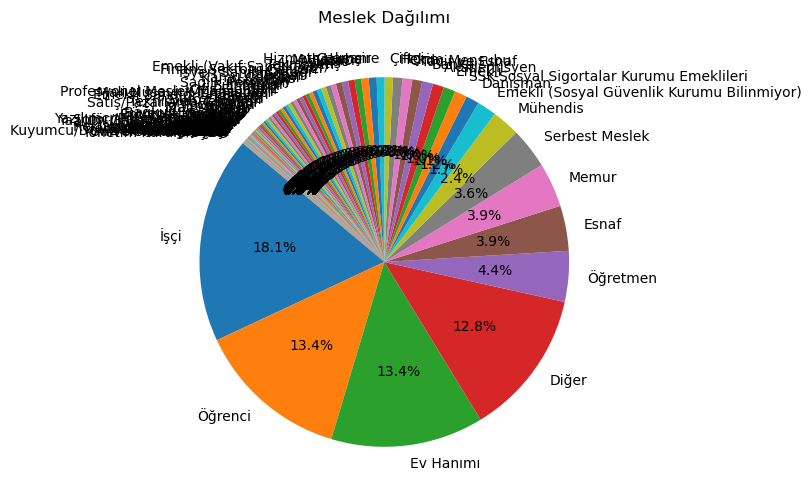

In [18]:
# 2-) Meslek analizi
print(df_train["PP_MESLEK"])
# df_train["PP_MESLEK"].nunique() kayıtlı 114 meslek türü var
value_counts_meslek = df_train["PP_MESLEK"].value_counts()
value_counts_meslek = df_train["PP_MESLEK"].value_counts()

# Pasta grafiği için etiketler ve değerler
labels = value_counts_meslek.index
sizes = value_counts_meslek.values

# Pasta grafiğini oluşturalım
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Daireyi daire olarak tutmak için
plt.title('Meslek Dağılımı')
plt.show()

Erkek sayisi:  431283 , Erkek orani: % 50.577388330739666
Kadin sayisi:  421436 , Kadin orani: % 49.422611669260334


Text(0.5, 1.0, 'Müşteri Cinsiyet Dağılımı')

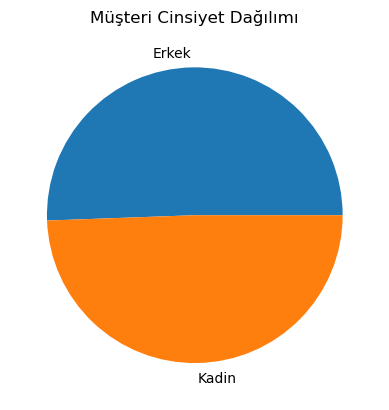

In [15]:
# 3-) Cinsiyet analizi
value_counts_cinsiyet = df_train["PP_CINSIYET"].value_counts()
erkek_sayisi = value_counts_cinsiyet.get(1, 0)
kadin_sayisi = value_counts_cinsiyet.get(2, 0)
print("Erkek sayisi: " , value_counts_cinsiyet.get(1, 0), ", Erkek orani: %", 100*value_counts_cinsiyet.get(1, 0)/(value_counts_cinsiyet.get(1,0)+value_counts_cinsiyet.get(2,0)))
print("Kadin sayisi: " , value_counts_cinsiyet.get(2, 0), ", Kadin orani: %", 100*value_counts_cinsiyet.get(2, 0)/(value_counts_cinsiyet.get(1,0)+value_counts_cinsiyet.get(2,0)))
plt.pie([erkek_sayisi,kadin_sayisi], labels=["Erkek", "Kadin"])
plt.title("Müşteri Cinsiyet Dağılımı")

FLAG
HAZIRAN    252193
MAYIS      246389
EKIM        93766
EYLUL       89170
TEMMUZ      86460
AGUSTOS     84741
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1cec05bd110>,
 [Text(0.65838334913148, 0.8812101710638706, 'HAZIRAN'),
  Text(-1.0233234759596517, 0.40349605146749157, 'MAYIS'),
  Text(-0.7028832509025783, -0.8461413212936851, 'EKIM'),
  Text(-0.02112283845872649, -1.0997971747988111, 'EYLUL'),
  Text(0.6461497603309957, -0.8902193478150185, 'TEMMUZ'),
  Text(1.0468250783910362, -0.3378716549987596, 'AGUSTOS')])

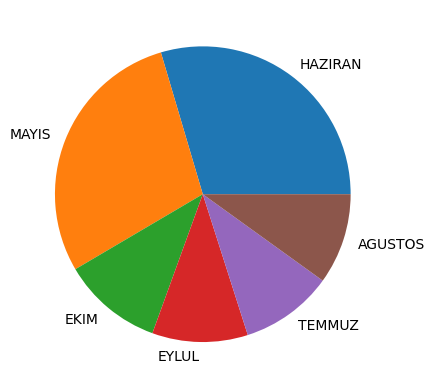

In [7]:
# 4-) Verinin hangi aya ait oldugunun analizi
print(df_train["FLAG"].value_counts())
months = df_train["FLAG"].value_counts().to_dict().keys()
month_values = df_train["FLAG"].value_counts().to_dict().values()
plt.pie(month_values, labels=months)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 122]


Text(0, 0.5, 'Müşteri Sayısı')

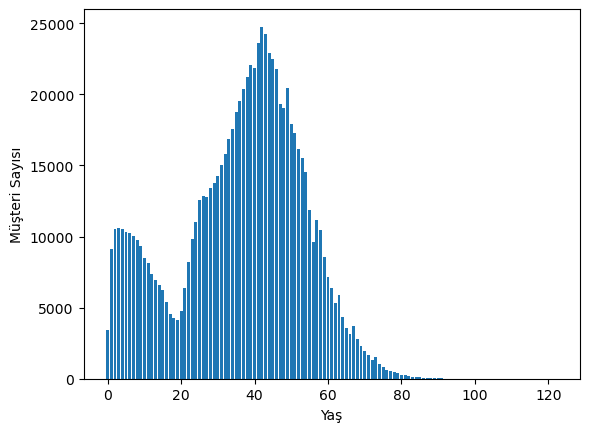

In [13]:
# 5-) Yas analizi (bar grafigi cikar)
df_train["YAS_YIL"] = df_train["PP_YAS"]//12
keys_yas = df_train["YAS_YIL"].value_counts().to_dict().keys()
values_yas = df_train["YAS_YIL"].value_counts().to_dict().values()

new_list = [int(x) for x in list(keys_yas)]
new_list.sort()
print(new_list)


plt.bar(keys_yas,values_yas)
plt.xlabel("Yaş")
plt.ylabel("Müşteri Sayısı")

[106, 105, 102, 104, 103, 101]


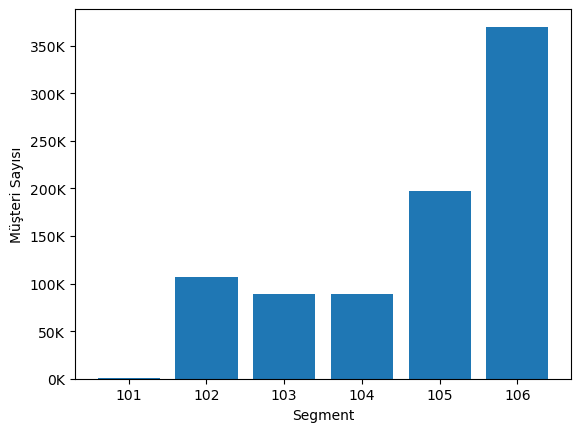

In [14]:
# 6-) Musteri segmenti analizi
dict = df_train["PP_MUSTERI_SEGMENTI"].value_counts().to_dict()
print(list(dict.keys()))
keys_segment = [name.__str__() for name in list(dict.keys())]
plt.bar(list(dict.keys()),list(dict.values()))
plt.xlabel("Segment")
plt.ylabel("Müşteri Sayısı")
def millions(x, pos):
    # formatting function as millions with x parameters
    return f'{x/1000:.0f}K'

formatter = FuncFormatter(millions)
plt.gca().yaxis.set_major_formatter(formatter)

tc:  848335   mavi: 2570   yabanci 1814


Text(0.5, 0, 'uyruk')

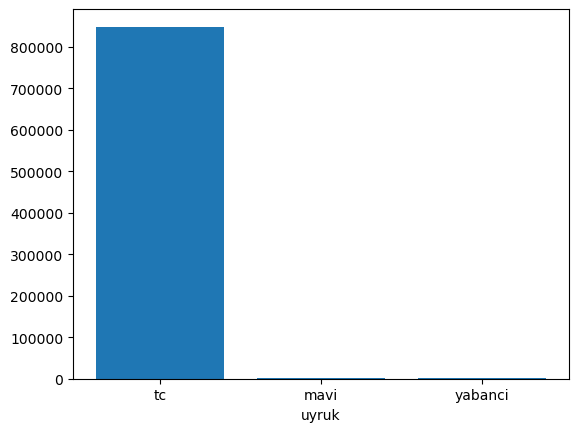

In [10]:
# 7-) Uyruk analizi
value_counts_uyruk = df_train["PP_UYRUK"].value_counts()
tc = value_counts_uyruk.get(1, 0)
mavi = value_counts_uyruk.get(2, 0)
yabanci = value_counts_uyruk.get(3, 0)
print("tc: ", tc, "  mavi:", mavi, "  yabanci", yabanci)
plt.bar(["tc", "mavi", "yabanci"],[tc, mavi, yabanci])
plt.xlabel("uyruk")

IL
34    204550
6      86350
35     62271
7      36034
16     30983
       ...  
62       813
56       792
29       776
75       615
69       500
Name: count, Length: 82, dtype: int64


Text(0, 0.5, 'Müşteri Sayısı')

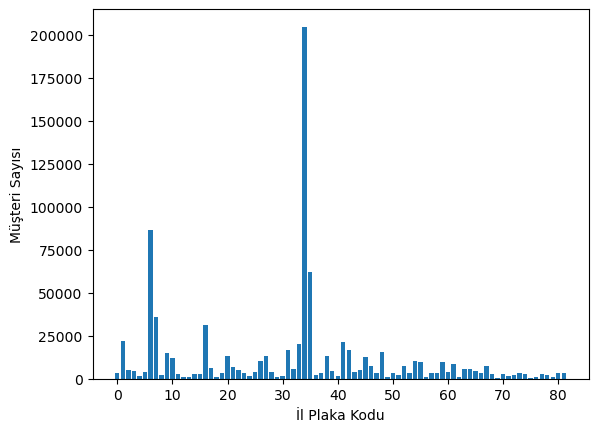

In [12]:
# 8-) Il analizi
print(df_train["IL"].value_counts())
plakalar = df_train["IL"].value_counts().to_dict().keys()
numbers_plakalar = df_train["IL"].value_counts().to_dict().values()
plt.bar(plakalar, numbers_plakalar)
plt.xlabel("İl Plaka Kodu")
plt.ylabel("Müşteri Sayısı")
